# Simulation of Thermalization in an Oscillating Particle: A Thermal Physics Project
> Alfaifi, Ammar -- 201855360




Thermalization is a fundamental concept in thermal physics, describing the process by which a system reaches thermal equilibrium with its surroundings. Understanding and studying thermalization is crucial for various scientific fields, including condensed matter physics, statistical mechanics, and quantum mechanics.

In this thermal physics project, we focus on simulating the thermalization of an oscillating particle. The project aims to investigate how an oscillating particle interacts with a heat reservoir and eventually reaches a state of thermal equilibrium.

The simulation utilizes numerical methods and Monte Carlo techniques to model the energy exchange between the oscillating particle and the heat reservoir. By incorporating principles from statistical mechanics, we can gain insights into the relaxation dynamics and energy distribution of the particle as it undergoes thermalization.

The project involves several key steps. Initially, we define the parameters, such as the number of particles in the reservoir, the temperature of the heat bath, and the amplitude of the particle's oscillation. These parameters play crucial roles in shaping the thermalization process.

Through a series of computational iterations, we simulate the interactions between the oscillating particle and the reservoir. At each time step, energy exchanges occur, influenced by random fluctuations, allowing the particle to reach a state of thermal equilibrium. We monitor the evolution of the energy distribution and observe how it converges towards the distribution dictated by the heat reservoir's temperature.

To visualize and analyze the thermalization process, we create an animation that showcases the changing energy distribution over time. By observing the animation and analyzing statistical properties, we gain a deeper understanding of the mechanisms underlying thermalization and the 

## Setup the Python packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import constants as con
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

Assume two particle particle one has a mass of $m_1$, and the other with much smmaller mass of $m_2$

In [116]:
m2 = 1.00784 * con.u # He mass
m1 = 10 * m2
omega = 2 * np.pi * 1.
k = omega**2 * m1

We define the wall's particle speed as a simple harmonic motion model. With the equation
$$
    v = -  A\omega \sin{(\omega t)}
$$
where $A$ is the position amplitude and $t$ is the time, would be random generated.
Which is the derivative of the position sinesoidal function
$$
 x = A \cos{(\omega t)}
$$

In [ ]:
def v1(t, amp=1):
    return - amp * omega * np.sin(omega * np.random.rand())

For collision of the particle in the box with the oscillating particle in the wall, we assume a ellastic collision, momentum and kinetic energy is conserved. The by solving the law of onservation of momentum with that of kinetic energy we get the velocity of the particle after collision as 
$$
    v_{2f} = \frac{2 m_1}{m_1 + m_2} v_1 - \frac{m_1 - m_2}{m_1+m_2} v_2
$$

In [ ]:
def v2_after(v1, v2):
    """Final velocity of particle 2 after collision
    with particle 1."""
    return 2*m1 / (m1+m2) * v1 - (m1-m2) / (m1+m2) * v2

This is to calculate the temperature using the kinetic theroy of gases, with one degree of motion
$$
    T = \frac{m \bar{v^2}}{k_B}
$$

In [128]:
def temp(v, m):
    return m * v**2 / (con.k)

## Showing Equality in Theory
### For Wall's Particle
We start from simple harmonic motion equation of speed,
$$
    v = -  A\omega \sin{(\omega t)}.
$$
The total mechanical energy of SHM
$$
    E = K + U = \frac{1}{2}kx^2 + \frac{1}{2} mv^2
$$
Or substituting $v$ and $x$
$$
    E = \frac{1}{2}k A^2 \cos^2{(\omega t)}
        + \frac{1}{2} m A^2 \omega^2 \sin^2{(\omega t)} \\
        = \frac{1}{2} k A^2
$$

Where $k$, from its definition, 
$$
    k = \omega^2 m
$$
So we can also write the total energy
$$
    E = \frac{1}{2} m\omega^2 A^2
$$
But we need only the maximum of kinetic energy to find out the temperature of this sytem, it'll be
$$
    K_{max} = \frac{1}{2} E = \frac{1}{4} m \omega^2 A^2
$$

### For Gas Particle
From the partition theorem and for one degree of motion, in x-axis only, the gas particle has an thermal energy of $\frac{1}{2}k_BT$. This energy all comes from the particle kinetic energy given by
$$
    K = \frac{1}{2} m \bar{v^2}
$$
where $\bar{v^2}$ is the average of squared speeds at all steps.

### From $K$ of Gas to Wall's Particle

From the above equaiton if we are to find the average speed from the SHM, we'd get
$$
    K = \frac{1}{2} m\, \langle (-A\omega \sin(\omega t))^2 \rangle \\
        = \frac{1}{2} m\, A^2 \omega^2 \underbrace{\langle \sin^2(\omega t) \rangle}_{1/2}
$$
$$
    K = \frac{1}{4} m\omega^2 A^2 
$$

Which is exactly as that we got from purly SHM theory. Moreover, since the temperature is directly proputional to the kinetic energy, meaning we actually we showed both particles reached the same temperature.

## Demostrating Thermalization
### The Stablization of Speed

0.0037546735952070655


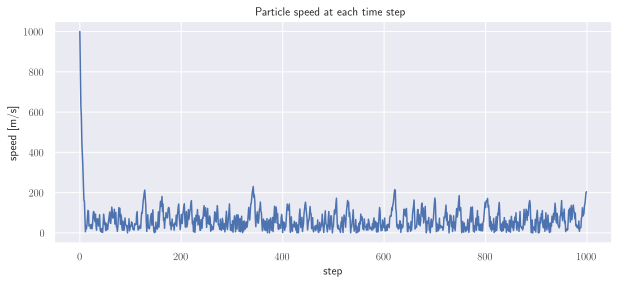

In [158]:
steps = 1000
A = 5
velocities = np.zeros(steps)
osc_velocities = np.zeros(steps)
time = np.arange(steps)
# initial speed
velocities[0] = 1000

for i in time[1:]:
    osc_velocities[i] = v1(i, A)
    velocities[i] = v2_after(osc_velocities[i], velocities[i-1])

plt.plot(time, abs(velocities))
plt.title("Particle speed at each time step")
plt.xlabel('step')
plt.ylabel('speed [m/s]')
plt.show()

In [160]:
velocities[300:].var()**.5, osc_velocities.var()**.5, osc_velocities.sum()/len(osc_velocities)

(75.5138647129598, 22.226037481862196, -0.5376637250567118)

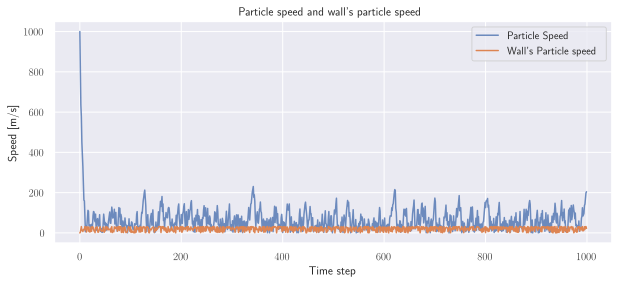

In [162]:
plt.plot(time, abs(velocities), label='Particle Speed', alpha=0.8)
plt.plot(time, abs(osc_velocities), label="Wall's Particle speed")
plt.title("Particle speed and wall's particle speed")
plt.xlabel("Time step")
plt.ylabel("Speed [m/s]")
plt.legend()
plt.show()

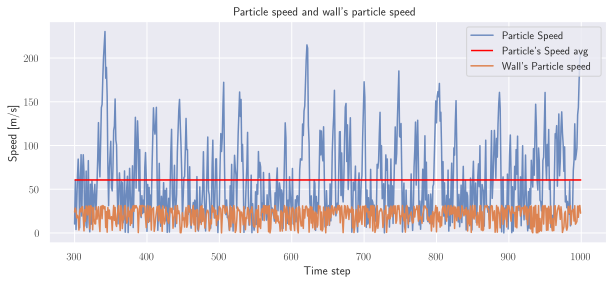

In [172]:
plt.plot(time[300:], abs(velocities[300:]), label='Particle Speed', alpha=0.8)
plt.hlines(np.mean(abs(velocities[300:])), 300, steps, color='red', label="Particle's Speed avg")
plt.plot(time[300:], abs(osc_velocities[300:]), label="Wall's Particle speed")
plt.title("Particle speed and wall's particle speed")
plt.xlabel("Time step")
plt.ylabel("Speed [m/s]")
plt.legend()
plt.show()

## Reaching Equilibrium Temperature

Showing that they did reach equilibrium

### Equality of Speed for Many Runs

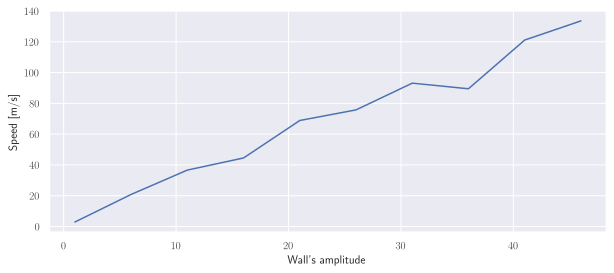

In [63]:
amps = np.arange(1, 50, 5)
variances = []
for amp in amps:
    for i in time[1:]:
        velocities[i] = v2_after(v1(i, amp), velocities[i-1])
    variances.append(velocities[300:].var())

plt.plot(amps, [np.sqrt(x) for x in variances])
plt.ylabel("Speed [m/s]")
plt.xlabel("Wall's amplitude")
plt.show()

### Temperatures for 10 Runs
In the following we show that get a good approximation of the thermalization, the ratio should be as close as to the unity to show that the temperature of the gas' particle is the same that of wall's oscillating particle.

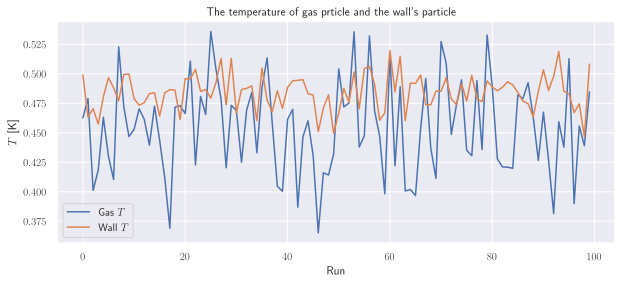

In [200]:
runs = 100
gas_temp = np.zeros(runs)
wall_temp = np.zeros(runs)

for run in range(runs):
    for i in time[1:]:
        osc_velocities[i] = v1(i, A)
        velocities[i] = v2_after(osc_velocities[i], velocities[i-1])
    gas_temp[run] = temp(np.mean(abs(velocities)), m2)
    wall_temp[run] = temp(np.mean(abs(osc_velocities)), m1)

plt.plot(np.arange(runs), gas_temp, label="Gas $T$")
plt.plot(np.arange(runs), wall_temp, label="Wall $T$")
plt.title("The temperature of gas prticle and the wall's particle")
plt.xlabel("Run")
plt.ylabel("$T$ [K]")
plt.legend()
plt.show()

### The allowed error
We use the sampling error formula from the statistics.

In [202]:
print(f"Percentage error in {steps} runs is {100/np.sqrt(steps):.3}%")

Percentage error in 1000 runs is 3.16%


Which is, in conclusion, is good enough approximateion to show the process of thermalization between the gas' particle temperature and the wall's temperature.